In [405]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

# read as a DataFrame
trainCSV = pd.read_csv('Train.csv')
testCSV = pd.read_csv('Test.csv')

# explore the first 5 rows
trainCSV.head()

#display test data
testCSV.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [406]:
#train shape
print(trainCSV.shape)

#test shape
print(testCSV.shape)

(8523, 12)
(5681, 11)


In [407]:
print(trainCSV.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None


In [408]:
print(testCSV.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB
None


In [409]:
print(trainCSV.describe())
print(testCSV.describe())

       Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800  
       Item_Weight  Item_Visibility     Item_

In [410]:
trainCSV.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [411]:
print(trainCSV.Outlet_Size.value_counts())
print(trainCSV.Item_Weight.value_counts())

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64
12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64


In [412]:
#replacing with mode in train then test data
trainCSV.Outlet_Size = trainCSV.Outlet_Size.fillna(trainCSV.Outlet_Size.mode()[0])
print(trainCSV.Outlet_Size.isnull().sum())

testCSV.Outlet_Size = testCSV.Outlet_Size.fillna(testCSV.Outlet_Size.mode()[0])
testCSV.Outlet_Size.isnull().sum()

0


0

Text(0.5, 1.0, 'Item_Weight Outliers')

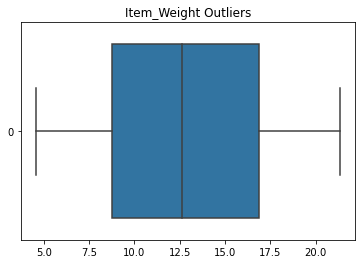

In [413]:
sns.boxplot(data = trainCSV.Item_Weight, orient='h')
plt.title("Item_Weight Outliers")

In [414]:
print(trainCSV.Item_Weight.mean())
print(trainCSV.Item_Weight.mode()[0])

#replacing with mean in train then test data
trainCSV.Item_Weight = trainCSV.Item_Weight.fillna(trainCSV.Item_Weight.mean())
print(trainCSV.Item_Weight.isnull().sum())

testCSV.Item_Weight = testCSV.Item_Weight.fillna(testCSV.Item_Weight.mean())
testCSV.Item_Weight.isnull().sum()

12.857645184136183
12.15
0


0

In [415]:
print(trainCSV.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None


In [416]:
print(testCSV.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                5681 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                5681 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB
None


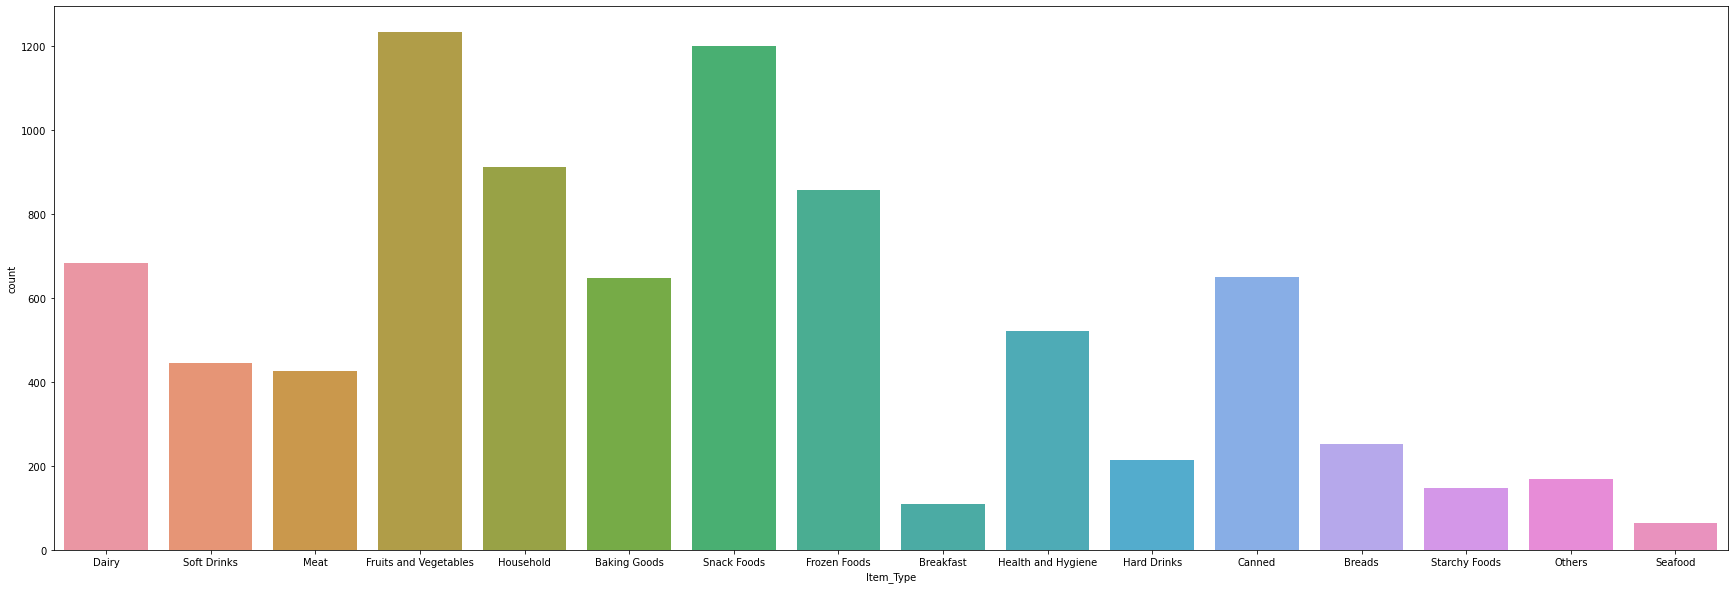

In [417]:
plt.figure(figsize=(30,10))
sns.countplot(x='Item_Type' , data=trainCSV)
plt.xlabel('Item_Type', fontsize = 10)
plt.show()

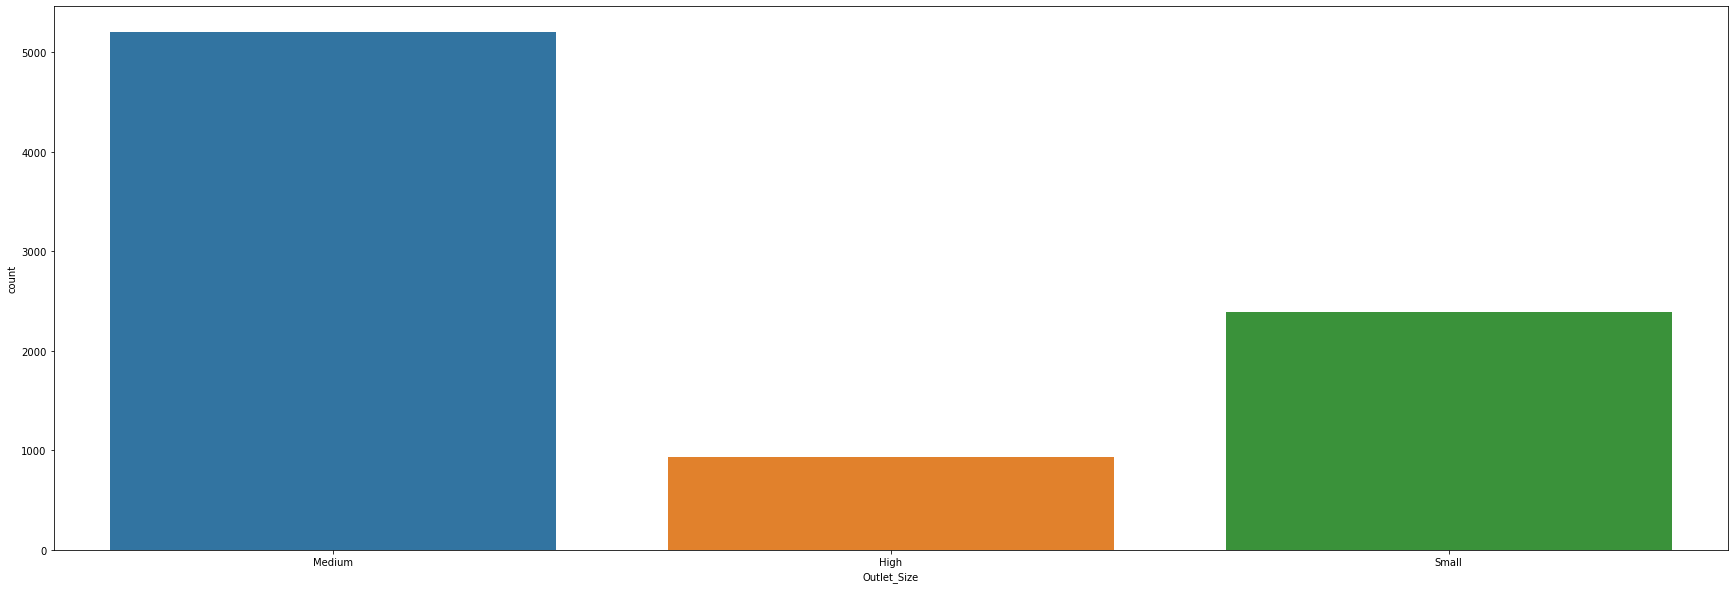

In [418]:
plt.figure(figsize=(30,10))
sns.countplot(x='Outlet_Size' , data=trainCSV)
plt.xlabel('Outlet_Size', fontsize = 10)
plt.show()

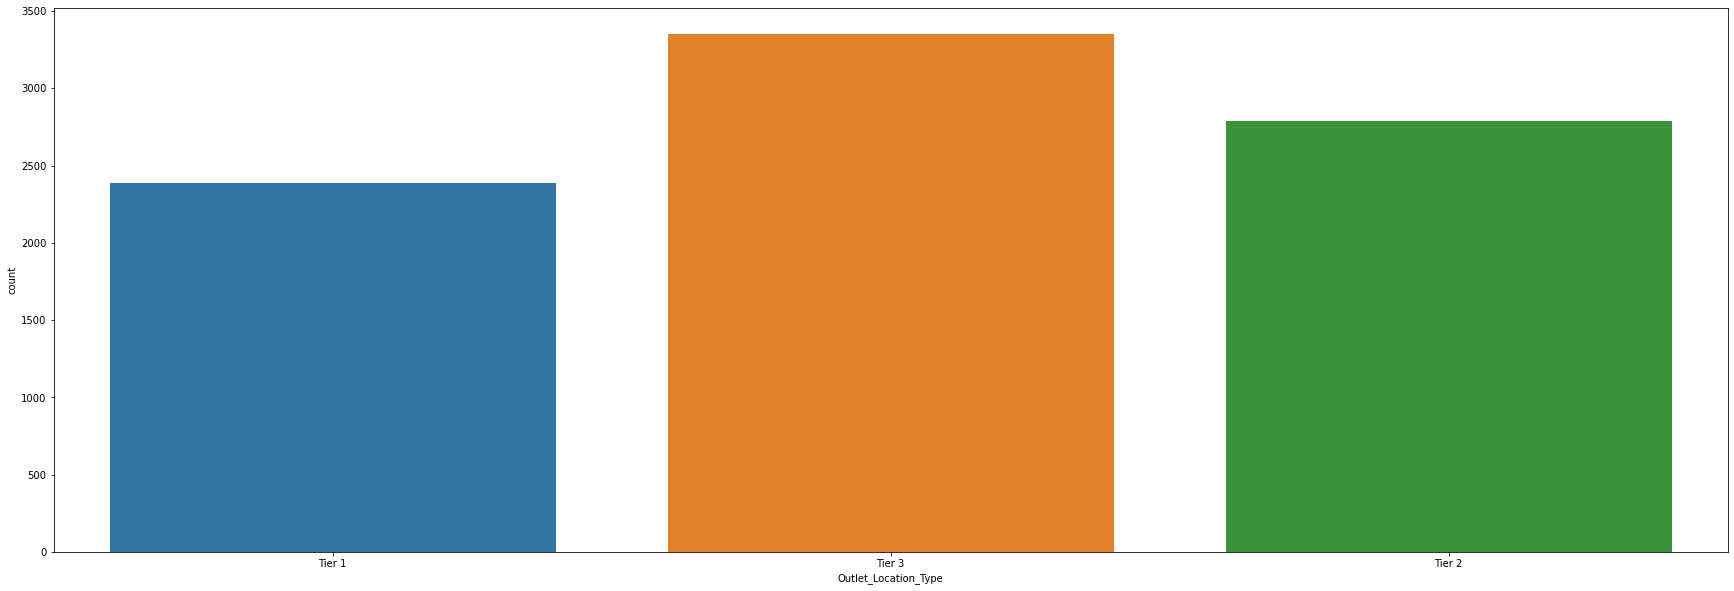

In [419]:
plt.figure(figsize=(30,10))
sns.countplot(x='Outlet_Location_Type' , data=trainCSV)
plt.xlabel('Outlet_Location_Type', fontsize = 10)
plt.show()

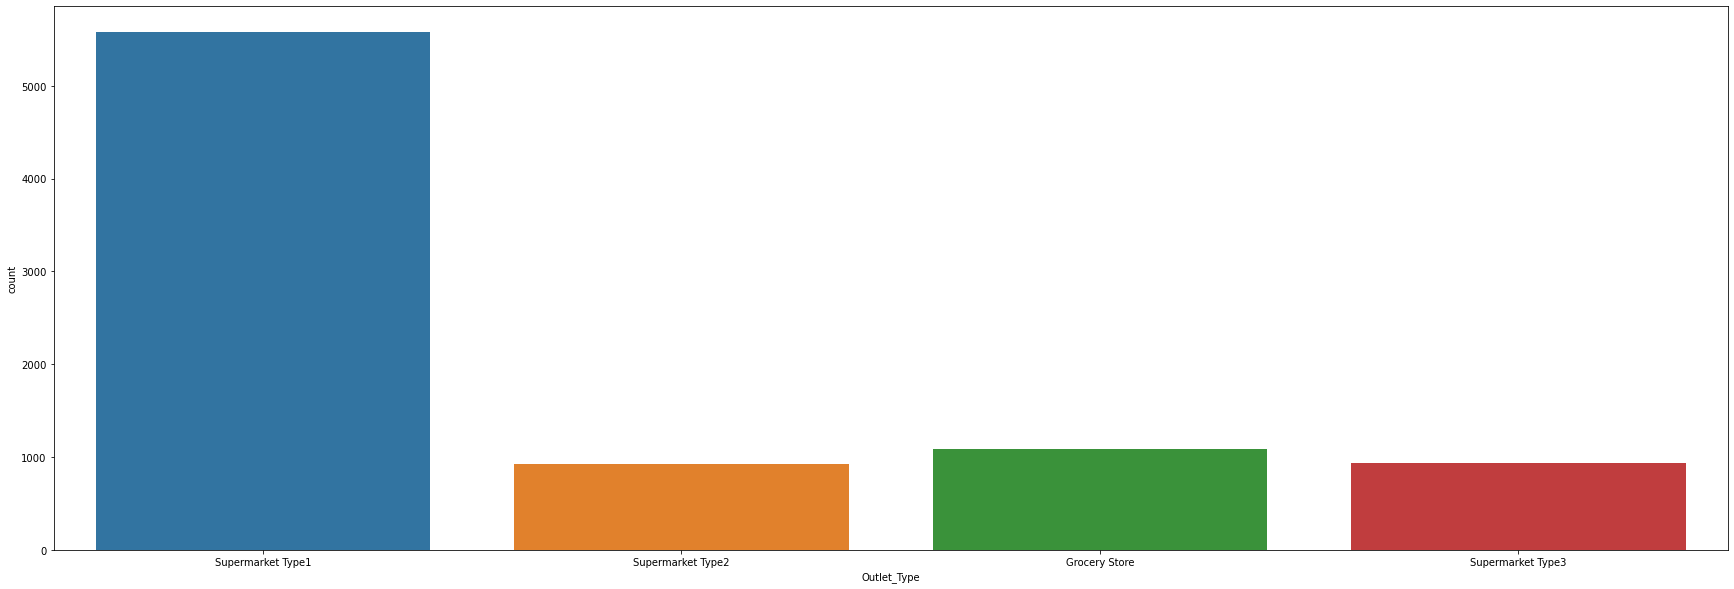

In [420]:
plt.figure(figsize=(30,10))
sns.countplot(x='Outlet_Type' , data=trainCSV)
plt.xlabel('Outlet_Type', fontsize = 10)
plt.show()

In [421]:
#plt.hist(trainCSV.Outlet_Age)
#plt.title('Outlet_Age')
#plt.show()
trainCSV.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [422]:
print(trainCSV.dtypes)

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object


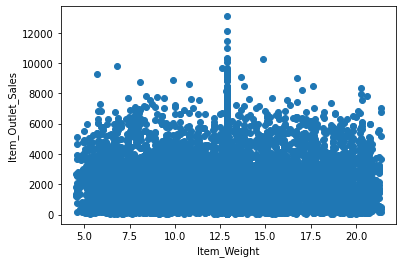

In [423]:
plt.scatter(trainCSV.Item_Weight, trainCSV.Item_Outlet_Sales)
plt.xlabel('Item_Weight')
plt.ylabel('Item_Outlet_Sales')
plt.show()

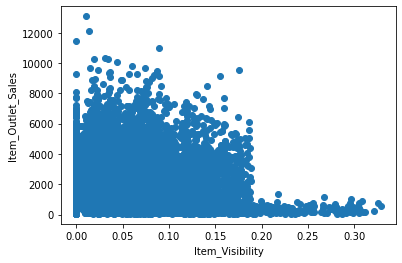

In [424]:
plt.scatter(trainCSV.Item_Visibility, trainCSV.Item_Outlet_Sales)
plt.xlabel('Item_Visibility')
plt.ylabel('Item_Outlet_Sales')
plt.show()

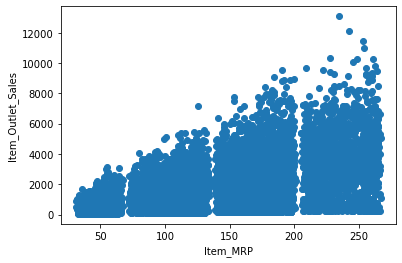

In [425]:
plt.scatter(trainCSV.Item_MRP, trainCSV.Item_Outlet_Sales)
plt.xlabel('Item_MRP')
plt.ylabel('Item_Outlet_Sales')
plt.show()

Text(0.5, 1.0, 'Outlet Age')

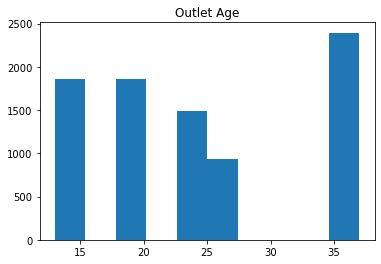

In [426]:
plt.hist(2022-trainCSV.Outlet_Establishment_Year)
plt.title('Outlet Age')

In [427]:
import datetime
currentYear = datetime.date.today().year

trainCSV['Outlet_Age']=currentYear-trainCSV.Outlet_Establishment_Year
testCSV['Outlet_Age']=currentYear-testCSV.Outlet_Establishment_Year

trainCSV.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,23
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,13
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,23
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,24
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,35


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


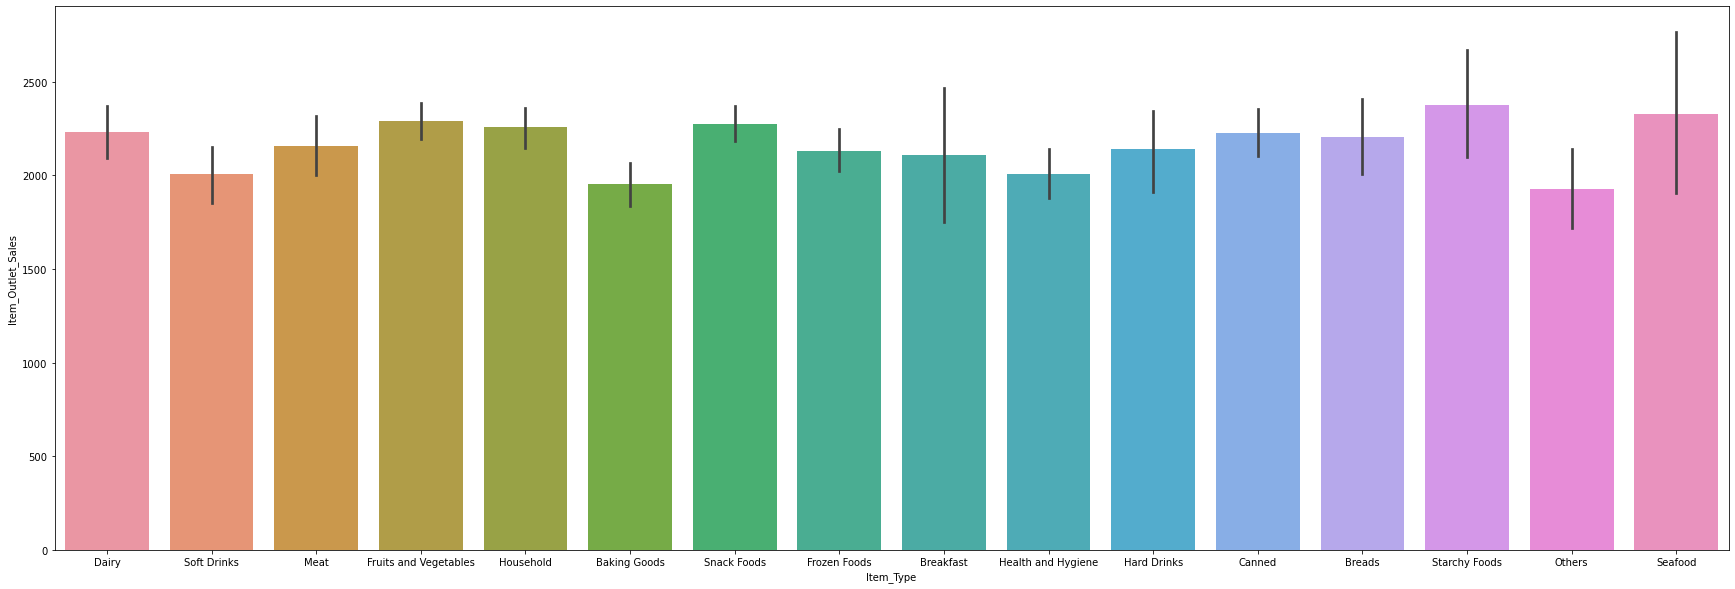

In [428]:
plt.figure(figsize=(30,10))
sns.barplot('Item_Type' ,'Item_Outlet_Sales', data=trainCSV)
plt.xlabel('Item_Type', fontsize=10)
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


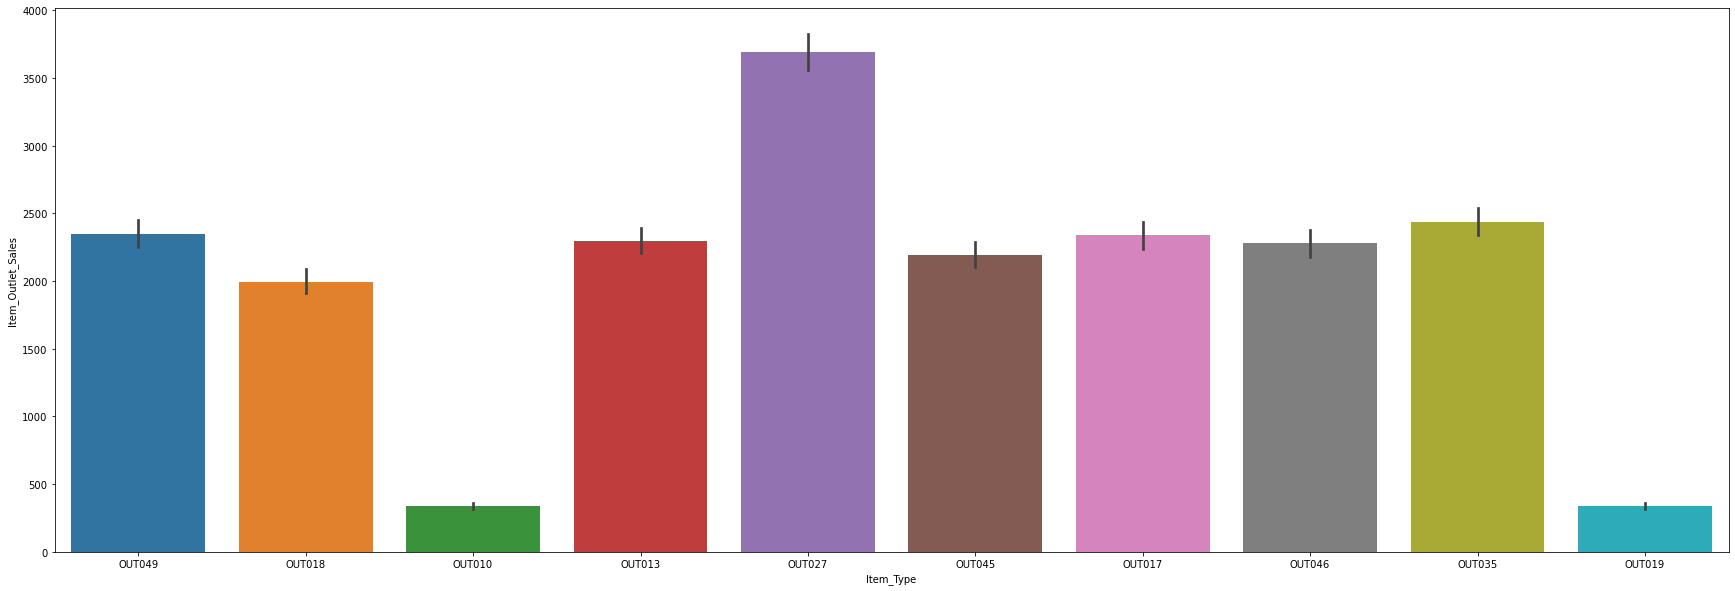

In [429]:
plt.figure(figsize=(30,10))
sns.barplot('Outlet_Identifier' ,'Item_Outlet_Sales', data=trainCSV)
plt.xlabel('Item_Type', fontsize=10)
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


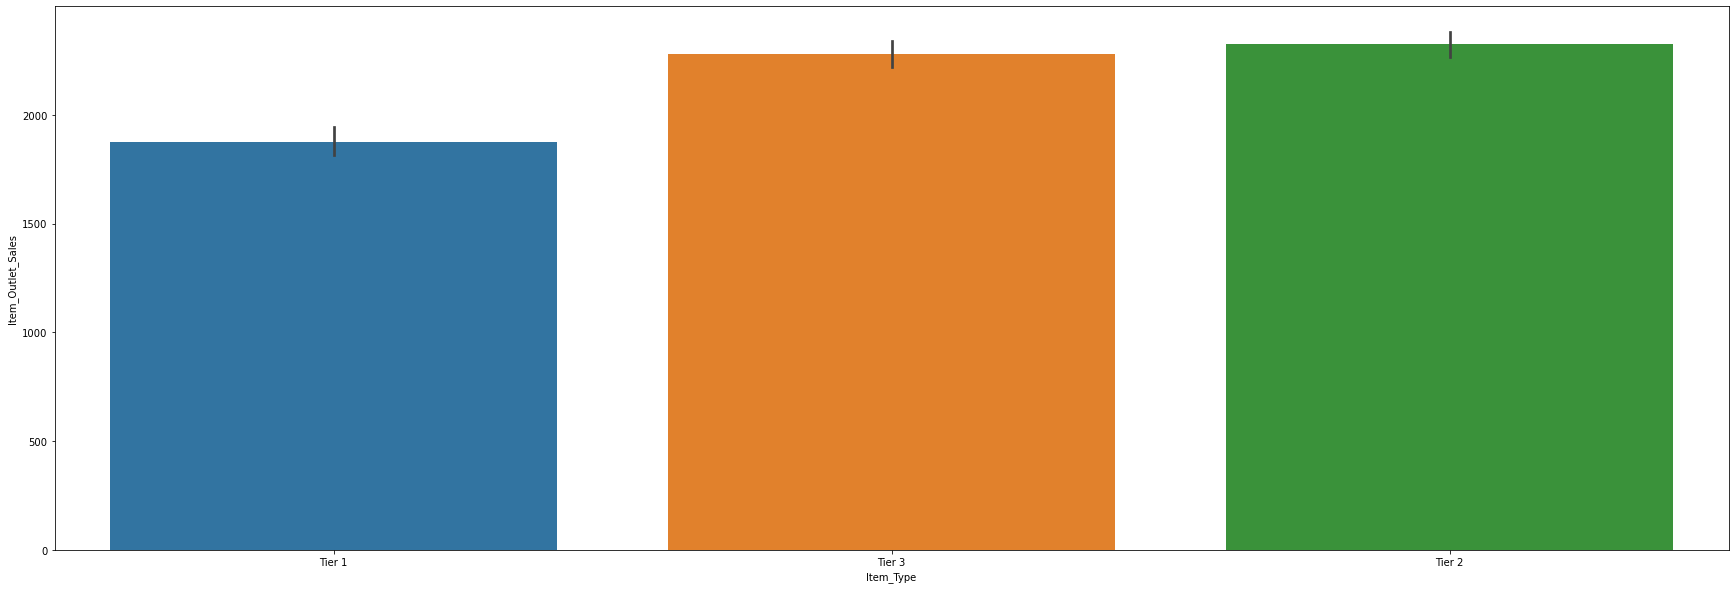

In [430]:
plt.figure(figsize=(30,10))
sns.barplot('Outlet_Location_Type' ,'Item_Outlet_Sales', data=trainCSV)
plt.xlabel('Item_Type', fontsize=10)
plt.show()

In [431]:
print(trainCSV.Item_Identifier)

0       FDA15
1       DRC01
2       FDN15
3       FDX07
4       NCD19
        ...  
8518    FDF22
8519    FDS36
8520    NCJ29
8521    FDN46
8522    DRG01
Name: Item_Identifier, Length: 8523, dtype: object


<AxesSubplot:>

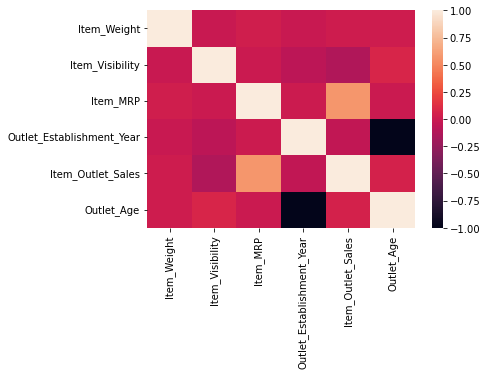

In [432]:
sns.heatmap(trainCSV.corr())

In [433]:
trainCSV.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
Outlet_Age                     int64
dtype: object

In [434]:
print(trainCSV.Item_Type)

0                       Dairy
1                 Soft Drinks
2                        Meat
3       Fruits and Vegetables
4                   Household
                ...          
8518              Snack Foods
8519             Baking Goods
8520       Health and Hygiene
8521              Snack Foods
8522              Soft Drinks
Name: Item_Type, Length: 8523, dtype: object


In [435]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

labelEncode = LabelEncoder()
columnName = ['Item_Fat_Content','Outlet_Size','Outlet_Location_Type']

In [436]:
for i in columnName:
    trainCSV[i] = labelEncode.fit_transform(trainCSV[i])
    testCSV[i] = labelEncode.fit_transform(testCSV[i])

trainCSV.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,1,0.016047,Dairy,249.8092,OUT049,1999,1,0,Supermarket Type1,3735.1380,23
1,DRC01,5.92,2,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,Supermarket Type2,443.4228,13
2,FDN15,17.50,1,0.016760,Meat,141.6180,OUT049,1999,1,0,Supermarket Type1,2097.2700,23
3,FDX07,19.20,2,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,Grocery Store,732.3800,24
4,NCD19,8.93,1,0.000000,Household,53.8614,OUT013,1987,0,2,Supermarket Type1,994.7052,35


In [437]:
#one hot encoding
columnName = ['Item_Type','Outlet_Type']


oneHotEncoder= OneHotEncoder(handle_unknown='ignore', sparse=False)
trainOneHot = pd.DataFrame(oneHotEncoder.fit_transform(trainCSV[columnName])).astype('int64')
testOneHot = pd.DataFrame(oneHotEncoder.fit_transform(testCSV[columnName])).astype('int64')

trainOneHot.columns = oneHotEncoder.get_feature_names(columnName)
testOneHot.columns = oneHotEncoder.get_feature_names(columnName)

trainOneHot.index=trainCSV.index
testOneHot.index=testCSV.index

newtrainCSV=pd.concat([trainCSV,trainOneHot],axis=1)
newtestCSV=pd.concat([testCSV,testOneHot],axis=1)

print(newtrainCSV)

     Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300                 1         0.016047   
1              DRC01        5.920                 2         0.019278   
2              FDN15       17.500                 1         0.016760   
3              FDX07       19.200                 2         0.000000   
4              NCD19        8.930                 1         0.000000   
...              ...          ...               ...              ...   
8518           FDF22        6.865                 1         0.056783   
8519           FDS36        8.380                 2         0.046982   
8520           NCJ29       10.600                 1         0.035186   
8521           FDN46        7.210                 2         0.145221   
8522           DRG01       14.800                 1         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               S

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [438]:
newtrainCSV = newtrainCSV.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Type','Item_Type'],axis=1)
newtestCSV = newtestCSV.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Type','Item_Type'],axis=1)

In [439]:
newtrainCSV.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Age,Item_Type_Baking Goods,Item_Type_Breads,...,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,1,0.016047,249.8092,1,0,3735.1380,23,0,0,...,0,0,0,0,0,0,0,1,0,0
1,5.92,2,0.019278,48.2692,1,2,443.4228,13,0,0,...,0,0,0,0,1,0,0,0,1,0
2,17.50,1,0.016760,141.6180,1,0,2097.2700,23,0,0,...,1,0,0,0,0,0,0,1,0,0
3,19.20,2,0.000000,182.0950,1,2,732.3800,24,0,0,...,0,0,0,0,0,0,1,0,0,0
4,8.93,1,0.000000,53.8614,0,2,994.7052,35,0,0,...,0,0,0,0,0,0,0,1,0,0


In [440]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
from sklearn.model_selection  import cross_val_score as CVS

y = newtrainCSV['Item_Outlet_Sales']
X = newtrainCSV.drop('Item_Outlet_Sales', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

#y_test = newtestCSV['Item_Outlet_Sales']
#X_test = newtestCSV.drop('Item_Outlet_Sales', axis = 1)


In [441]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

linRegressor = LinearRegression(normalize=True)
linRegressor.fit(X_train, y_train)

y_predict = linRegressor.predict(X_test)
linRegMSE = mean_squared_error(y_test, y_predict)
linRegMAE = mean_absolute_error(y_test, y_predict)

print(linRegMSE, linRegMAE)

1304645.6478543577 838.3492211019931


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [442]:
randomForest= RandomForestRegressor(n_estimators=200,max_depth=5,)
randomForest.fit(X_train, y_train)

y_predict = randomForest.predict(X_test)

randomForestMSE = mean_squared_error(y_test, y_predict)
randomForestMAE = mean_absolute_error(y_test, y_predict)

print(randomForestMSE, randomForestMAE)

1188207.7312682678 760.2173892247494


In [456]:
newtestCSV.head()

y_predict = pd.DataFrame(randomForest.predict(newtestCSV))
finalResults = pd.concat([newtestCSV, y_predict],axis=1)


print(finalResults.head())

   Item_Weight  Item_Fat_Content  Item_Visibility  Item_MRP  Outlet_Size  \
0    20.750000                 1         0.007565  107.8622            1   
1     8.300000                 4         0.038428   87.3198            1   
2    14.600000                 1         0.099575  241.7538            1   
3     7.315000                 1         0.015388  155.0340            1   
4    12.695633                 2         0.118599  234.2300            1   

   Outlet_Location_Type  Outlet_Age  Item_Type_Baking Goods  Item_Type_Breads  \
0                     0          23                       0                 0   
1                     1          15                       0                 0   
2                     2          24                       0                 0   
3                     1          15                       0                 0   
4                     2          37                       0                 0   

   Item_Type_Breakfast  ...  Item_Type_Others  Item_Type

In [457]:
import pickle
filename = 'miniProj.sav'
pickle.dump(randomForest, open(filename, 'wb'))